<a href="https://colab.research.google.com/github/oktaviacitra/ai-course-in-graduate-school/blob/main/PlayTennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

origin_path = '/content/drive'
drive.mount(origin_path)

Mounted at /content/drive


In [2]:
import pandas as pd

folder_path = origin_path + "/MyDrive/Learning Journey/Play Tennis"
dataset_path = folder_path + "/dataset.csv"
dataframe = pd.read_csv(dataset_path, sep=";")
dataframe.head(3)

,Day,Outlook,Temperature,Humidity,Wind,Play Tennis
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes


In [16]:
feature_columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']
X = dataframe[feature_columns]
y = dataframe['Play Tennis']

In [17]:
from sklearn.preprocessing import LabelEncoder

for feature in feature_columns:
  X[feature] = LabelEncoder().fit_transform(X[feature])
y = LabelEncoder().fit_transform(y)
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

clf = DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

[Text(0.4444444444444444, 0.9, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.7, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'entropy = 0.0\nsamples = 

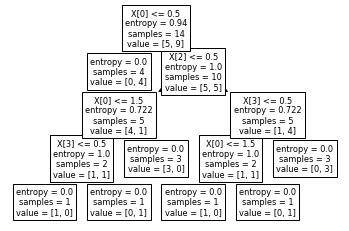

In [10]:
plot_tree(clf)

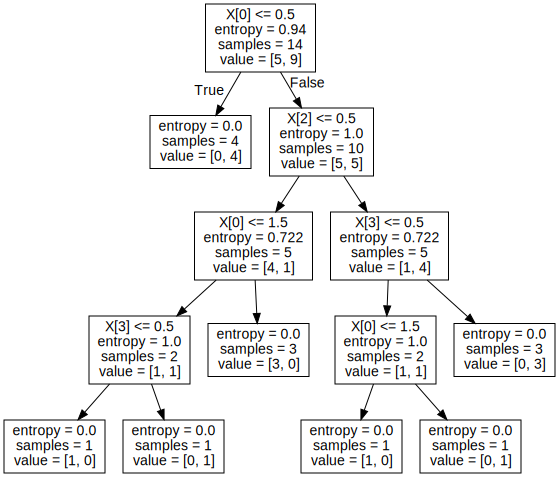

In [13]:
import graphviz 

dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [20]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X)
accuracy_score(y, y_pred)

1.0